In [1]:
import numpy as np
import sympy as sym
from sympy import init_printing
init_printing() 

In [12]:
t= sym.Symbol('t')
state = map( lambda y: sym.Function(y)(t),'x_c dx_c \\theta d\\theta'.split() )
xc, dxc, theta, dtheta = state
l, m, g, R = sym.symbols('l m g L')

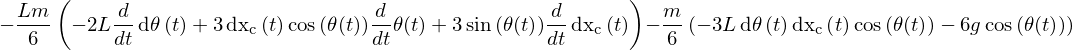

In [14]:
#m = 1
#g = 9.8
#L = 0.1
#I = m / l * l**3 / 3
rho = m / R
Kx = rho * sym.integrate((-l * sym.sin(theta) * dtheta + dxc) **2 / 2 , (l,0,R))
Ky = rho * sym.integrate((l * sym.cos(theta) * dtheta) **2 / 2 , (l,0,R))
V = m * g * sym.sin(theta) * R / 2
L = Kx + Ky - V

L = sym.simplify(sym.expand(L))
eqoM = sym.diff(L ,dtheta , t) - sym.diff(L, theta)
eqoM

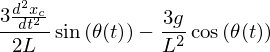

In [16]:
ddtheta = sym.solve(eqoM, sym.Derivative(dtheta, t))[0]
ddxc =  sym.Symbol('\\frac{d^{2}x_c}{dt^2}')
ddtheta = ddtheta.subs(sym.Derivative(theta,t), dtheta).subs(sym.Derivative(dxc,t), ddxc)
ddtheta = sym.expand(ddtheta)

In [17]:
 f = sym.lambdify((ddxc, theta, dtheta, R, g), ddtheta)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

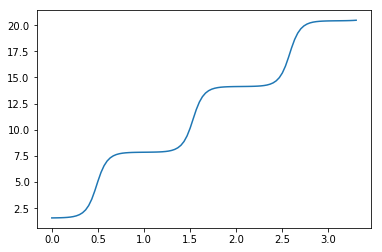

In [29]:
thetas = []
dthetas = []
N = 100
theta = np.pi/2
thetadot = 0.1
dt = 1/30
ts = np.arange(N)*dt
g = 9.8
L = 0.4
a = 0
for i in range(N):
    theta += thetadot * dt
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    thetas.append(theta)
    dthetas.append(thetadot)
plt.plot(ts,thetas)

Feedback control

-54.0


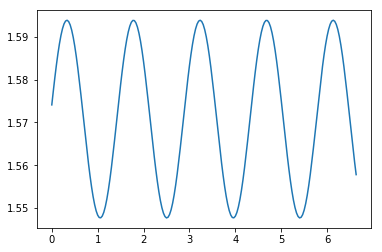

In [212]:
thetas = []
dthetas = []
N = 200
theta = np.pi/2
thetadot = 0.1
dt = 1.0/30
ts = np.arange(N)*dt
g = 9.8
L = 0.4
a = 0
Kd = 10
Kd = -(g + 1) * 2 / L # The one puts us over gravity
print(Kd)
for i in range(N):
    theta += thetadot * dt
    a = Kd * (theta - np.pi/2)
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    #print(thetadot)
    thetas.append(theta)
    dthetas.append(thetadot)
plt.plot(ts,thetas)

Thetadot proprptional control

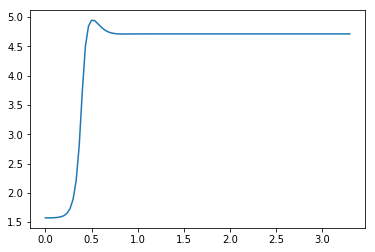

In [109]:
thetas = []
dthetas = []
N = 100
theta = np.pi/2
thetadot = 0.01
dt = 1/30
ts = np.arange(N)*dt
g = 9.8
L = 0.4
a = 0
Kd = 5.0
for i in range(N):
    theta += thetadot * dt
    a = Kd * (thetadot)
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    thetas.append(theta)
    dthetas.append(thetadot)
plt.plot(ts,thetas)

thetadot and theta proportional control

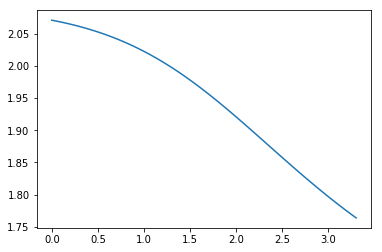

In [260]:
thetas = []
dthetas = []
N = 100
theta = np.pi/2 + 0.5
thetadot = 0#0.9
dt = 1/30
ts = np.arange(N)*dt
g = 9.8
L = 0.4
a = 0
Kp = -(g + 1) * 2 / L
Kpd = -10
for i in range(N):
    a = Kpd * (thetadot) + Kp * (theta - np.pi/2)
    theta += thetadot * dt 
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    thetas.append(theta)
    dthetas.append(thetadot)
plt.plot(ts,thetas)

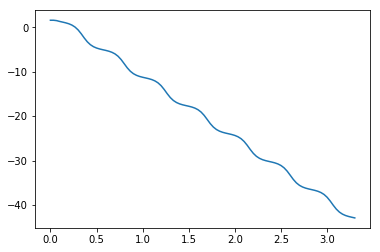

In [238]:
thetas = []
dthetas = []
N = 100
theta = np.pi/2
thetadot = 0.001
dt = 1/30
ts = np.arange(N)*dt
g = 9.8
L = 0.4
a = 0
Kp = -(g + 1) * 2 / L
Kpd = 0
for i in range(N):
    a = 20 * np.sign(Kpd * (thetadot) + Kp * (theta - np.pi/2))
    theta += thetadot * dt
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    thetas.append(theta)
    dthetas.append(thetadot)
plt.plot(ts,thetas)

Hmm. Does not appear to be particularly controllable? Nah, it is. I was looking in the totally wrong parameter space.
Now let's look at delay

-54.0


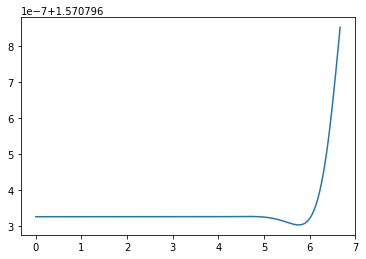

In [228]:
thetas = []
dthetas = []
N = 200
delay = 1
theta = np.pi/2
thetadot = 0#0.00001
dt = 1.0/30
ts = np.arange(N+delay)*dt
g = 9.8
L = 0.4
a = 0
Kd = 10
Kd = -(g + 1) * 2 / L
print(Kd)

for i in range(delay):
    theta += thetadot * dt
    a = 0
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    #print(thetadot)
    thetas.append(theta)
    dthetas.append(thetadot)
for i in range(N):
    theta += thetadot * dt
    a = Kd * (thetas[i] - np.pi/2)
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    #print(thetadot)
    thetas.append(theta)
    dthetas.append(thetadot)
plt.plot(ts,thetas)

Turns a formerly stable control into unstable. Let's add a predictor. Helps a lot, it damn well should since the predictor copies 

-54.0


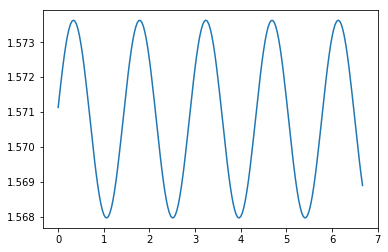

In [282]:
thetas = []
dthetas = []
N = 200
delay = 1
theta = np.pi/2
thetadot = 0.01
dt = 1.0/30
ts = np.arange(N+delay)*dt
g = 9.8
L = 0.4
a = 0
Kd = 10
Kd = -(g + 1) * 2 / L
print(Kd)

for i in range(delay):
    theta += thetadot * dt
    a = 0
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    #print(thetadot)
    thetas.append(theta)
    dthetas.append(thetadot)
def predict(theta,thetadot, n):
    for i in range(n):
        theta += thetadot * dt
        a = 0
        thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    return theta
    

for i in range(N):
    theta += thetadot * dt
    a = Kd * (predict(thetas[i],thetadot, delay) - np.pi/2)
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    #print(thetadot)
    thetas.append(theta)
    dthetas.append(thetadot)
plt.plot(ts,thetas)

-54.0
0.0
0.00118530153702
0.00328776929301
0.00684982925055
0.0127210235477
0.0103437475567
0.00928039042659
0.00472057018429
-0.00602029819854
-0.0272488124155
-0.0389995046689
-0.0535600628038
-0.061507768411
-0.0521839171531
-0.00699503618449
0.0448259148105
0.123379669433
0.214412708724
0.290149882851
0.288930848026
0.228035778085
0.0447931005509
-0.261030298234
-0.645176546845
-0.99331524575
-1.32103376754
-1.46606133935
-1.33529709035
-0.867207418176
-0.109607363723
0.893991373405
1.7230646686
2.02121964656
0.579972043342
-0.245362935025
-0.308792487935
-0.516970454444
2.93388229236
-0.510281191347
-0.968720669763
-1.50548545193
1.02779199406
2.5605218254
-0.652404959579
-0.686337897569
-0.0234699061667
-0.0865346970915
0.981958011087
1.93473437382
0.332154832641


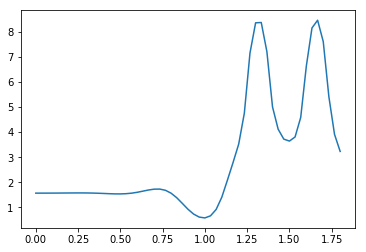

In [330]:

thetas = []
dthetas = []
ass = []
N = 50
delay = 5
theta = np.pi/2
thetadot = 0.01
dt = 1.0/30
ts = np.arange(N+delay)*dt
g = 9.8
L = 0.4
a = 0
Kd = 10
Kd = -(g + 1) * 2 / L
print(Kd)
Kpd = 0

for i in range(delay):
    theta += thetadot * dt
    a = 0
    ass.append(a)
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    #print(thetadot)
    thetas.append(theta)
    dthetas.append(thetadot)
    
def predict(theta,thetadot, ass, n):
    thetadot += 0#np.random.randn()*0.01
    theta += 0#np.random.randn()*0.01
    
    for i in range(n):
        theta += thetadot * dt
        a = ass[i]
        thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    return theta, thetadot
    

for i in range(N):
    
    ptheta, pthetadot = predict(thetas[i],dthetas[i],ass[i:i+delay], delay)
    a = Kd * (ptheta - np.pi/2) + Kpd * (pthetadot) #+ np.random.randn()*0.01
    theta += thetadot * dt
    print(ptheta-theta)
    ass.append(a)
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    #print(thetadot)
    thetas.append(theta)
    dthetas.append(thetadot)
plt.plot(ts,thetas)

Still Ok. Some rare events? Seems acceptably robust to observation and control noise. However, upon somethreshold being reached in noise it becomes uncontrollable
So. Lessons: We should measure the falling paramter g / L. Uhh. Actually We hsouldn't really have to. 

-54.0
0.00292780216117
0.00368466314101
0.00357859945211
0.00205678775851
-0.00226904308133
-0.00741532956112
-0.0156590538954
-0.0280849995153
-0.0442100017019
-0.0567587345647
-0.0721075320035
-0.0815039337181
-0.0726855485891
-0.0328854901872
0.0351121653048
0.15606747683
0.351481939183
0.617941234598
0.933996048672
1.26597333231
1.55297805883
1.87925517398
2.53419209205
2.43514768665
0.480581330118
-4.53684448256
-8.23059626518
-3.15920946929
8.12328223318
22.7091487757
9.10439334273
-6.56847067304
-9.2104063021
-12.1557974868
-4.7462187387
-24.4394005542
-47.512894583
-36.2069456367
9.06427804962
21.7670532219
49.8805306626
37.0941740657
83.0717102423
51.7269042841
163.669253564
7.37687236525
-86.7222428355
-242.482372266
-244.437793217
-156.750768224
112.334783569
245.742797257
187.171912456
-82.8037013722
-1.7348028553
257.799168741
-141.422498122
142.921174603
-12.7026286174
-70.7061750228
-184.136242408
47.4907272395
184.675879496
463.573534869
664.011925398
370.680513575
77.2

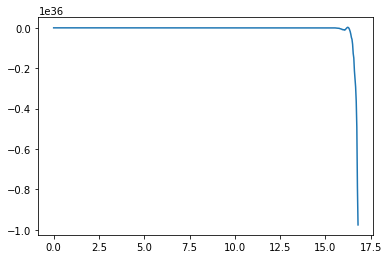

In [329]:

thetas = []
dthetas = []
N = 500
delay = 5
theta = np.pi/2
thetadot = 0.01
dt = 1.0/30
ts = np.arange(N+delay)*dt
g = 9.8
L = 0.4
a = 0
Kd = 10
Kd = -(g + 1) * 2 / L
print(Kd)
Kpd = -10

for i in range(delay):
    theta += thetadot * dt
    a = 0
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    #print(thetadot)
    thetas.append(theta)
    dthetas.append(thetadot)
def predict(theta,thetadot, n):
    thetadot += 0#np.random.randn()*0.1
    theta += 0#np.random.randn()*0.1
    
    for i in range(n):
        theta += thetadot * dt
        a = 0
        thetadot += 0
    return theta, thetadot
    

for i in range(N):
    theta += thetadot * dt
    ptheta, pthetadot = predict(thetas[i],dthetas[i], delay)
    print(theta-ptheta)
    a = Kd * (ptheta - np.pi/2) + Kpd * (pthetadot) + np.random.randn()*0.1
    thetadot += (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    #print(thetadot)
    thetas.append(theta)
    dthetas.append(thetadot)
plt.plot(ts,thetas)

Hmm. The dumb predictor does.

Not working.
Paths forward: Reinforcement Learning. First on openai cartpole
Which flavor though? Q-Learning? 

LQR style control


Right. So 1. I never saw the exact predictor work like no delay. That's weird

-54.0


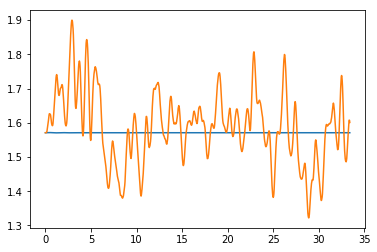

In [509]:

thetas = []
thetas2 = []
dthetas = []
dthetas2 = []
pth = []
th = []
N = 1000
delay = 3
theta = np.pi/2
theta2 = np.pi/2
thetadot = 0.001
thetadot2 = 0.001
dt = 1.0/30
ts = np.arange(N+delay)*dt
g = 9.8
L = 0.4
a = 0
Kd = 10
Kd = -(g + 1) * 2 / L
print(Kd)
Kpd = -2

ass = [0]

for i in range(delay):

    a = 0
    #ass.append(a)
    theta, thetadot = step(theta,thetadot,a)
    theta2, thetadot2 = step(theta2,thetadot2,a)
    thetas.append(theta)
    dthetas.append(thetadot)
    thetas2.append(theta2)
    dthetas2.append(thetadot2)
    ass.append(a)
    

def step(theta, thetadot1, a):
    theta = theta + thetadot1 * dt
    thetadot1 = thetadot1 +  (3 / 2 * a * np.sin(theta) / L - 3 * g * np.cos(theta) / L**2) * dt
    return theta, thetadot1
       
def predict(theta3,thetadot3,a, n):
    thetadot3 += np.random.randn()*0.01
    theta3 += np.random.randn()*0.01
    
    for i in range(n-1):
        #print("int loop")
        #thetadot2 = thetadot3
        a = Kd * (theta3 - np.pi/2) + Kpd * (thetadot3)
        theta3, thetadot3 = step(theta3, thetadot3, a)
        #a = Kd * (theta3 - np.pi/2) + Kpd * (thetadot3)
    #_, thetadot3 = step(theta3, thetadot3, 0)
    return theta3, thetadot3
    
#theta2 = theta
#thetadot2 = thetadot
for i in range(N):
    ptheta, pthetadot = predict(thetas2[-delay],dthetas2[-delay],ass[-delay], delay)
    #print(theta-ptheta)
    #print(thetadot-pthetadot)
    pth.append(pthetadot)
    #pt.append(ptheta)
    th.append(thetadot)
    a = Kd * (theta - np.pi/2) + Kpd * (thetadot)
    a2 = Kd * (ptheta - np.pi/2) + (Kpd-0.5) * (pthetadot) #+ np.random.randn()*0.1
    ass.append(a2)
    #print(a2-a)
    theta2, thetadot2 = step(thetas2[-1], dthetas2[-1], a2)
    theta, thetadot = step(thetas[-1], dthetas[-1], a)
    #theta2, thetadot2 = step(theta2, thetadot2, a)
    thetas.append(theta)
    dthetas.append(thetadot)
    thetas2.append(theta2)
    dthetas2.append(thetadot2)

plt.plot(ts,thetas)
plt.plot(ts,thetas2)
#plt.plot(pth[0:40])
#plt.plot(th[0:40])